#Naive Bayes Classifier with Synthetic Dataset

In the first example, we will generate synthetic data using scikit-learn and train and evaluate the Gaussian Naive Bayes algorithm. 

#Generating the Dataset
Scikit-learn provides us with a machine learning ecosystem so that you can generate the dataset and evaluate various machine learning algorithms. 

In our case, we are creating a dataset with six features, three classes, and 800 samples using the `make_classification` function. 

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

We will use matplotlib.pyplot’s `scatter` function to visualize the dataset. 

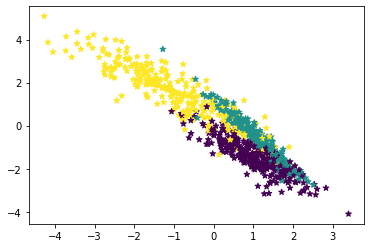

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

As we can observe, there are three types of target labels, and we will be training a multiclass classification model. 

#Train Test Split
Before we start the training process, we need to split the dataset into training and testing for model evaluation. 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

#Model Building and Training 
Build a generic Gaussian Naive Bayes and train it on a training dataset. After that, feed a random test sample to the model to get a predicted value.

In [4]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


#Model Evaluation
We will not evolve the model on an unseen test dataset. First, we will predict the values for the test dataset and use them to calculate accuracy and F1 score. 

In [5]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


To visualize the Confusion matrix, we will use `confusion_matrix` to calculate the true positives and true negatives and `ConfusionMatrixDisplay` to display the confusion matrix with the labels.

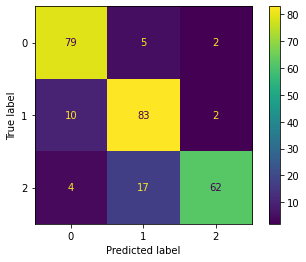

In [6]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#Naive Bayes Classifier with Loan Dataset

#Data Loading
In this example, we will be loading Loan Data from DataCamp Workspace using pandas 'read_csv` function. 

In [7]:
import pandas as pd


df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#Data Exploration
To understand more about the dataset we will use `.info()`.

The dataset consists of 14 columns and 9578 rows.
Apart from “purpose”, columns are either floats or integers. 
Our target column is “not.fully.paid”. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In this example, we will be developing a model to predict the customers who have not fully paid the loan. Let’s explore the purpose and target column by using seaborn’s countplot. 

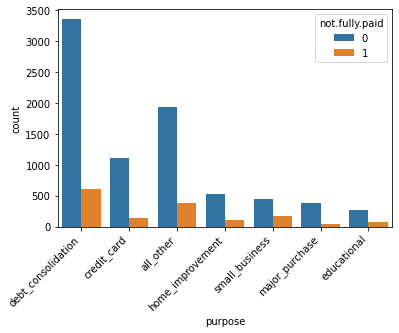

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

#Data Processing 
We will now convert the ‘purpose’ column from categorical to integer using pandas `get_dummies` function.

In [10]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


After that, we will define feature (X) and target (y) variables, and split the dataset into training and testing sets. 

In [11]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

#Model Building and Training
Model building and training is quite simple. We will be training a model on a training dataset using default hyperparameters. 

In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

#Model Evaluation
We will use accuracy and f1 score to determine model performance, and it looks like the Gaussian Naive Bayes algorithm has performed quite well. 

In [13]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8206263840556786
F1 Score: 0.8686606980013266


Due to the imbalanced nature of the data, we can see that the confusion matrix tells a different story. On a minority target: `not fully paid`, we have more mislabeled. 

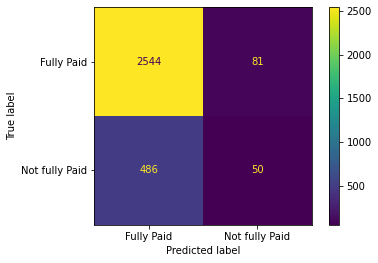

In [14]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();